In [ ]:
! pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"tayyibismail","key":"0d268b7790fa8080d3c57f3a301ca102"}'}

In [ ]:
! mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])

['with_mask_776.jpg', 'with_mask_2262.jpg', 'with_mask_515.jpg', 'with_mask_2336.jpg', 'with_mask_1895.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])

['without_mask_2258.jpg', 'without_mask_2072.jpg', 'without_mask_1743.jpg', 'without_mask_150.jpg', 'without_mask_2117.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
with_mask_labels = [1]*3725
print(with_mask_labels[0:5])

without_mask_labels = [0]*3828
print(without_mask_labels[0:5])

labels = with_mask_labels + without_mask_labels
print(labels[0],labels[-1])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
1 0


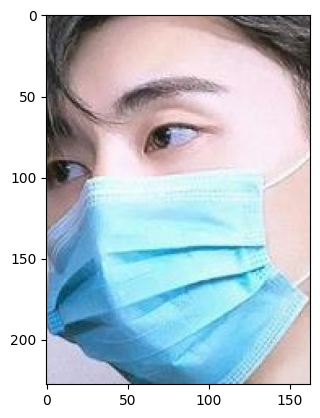

In [ ]:

img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

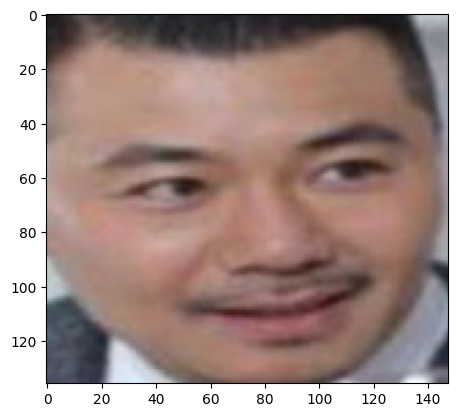

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_205.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


X = np.array(data)
Y = np.array(labels)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
data[0]

array([[[ 77, 130, 211],
        [ 89, 144, 228],
        [ 94, 152, 238],
        ...,
        [109, 164, 235],
        [109, 164, 240],
        [107, 163, 242]],

       [[ 78, 131, 207],
        [ 91, 146, 224],
        [ 95, 153, 234],
        ...,
        [117, 162, 251],
        [116, 161, 254],
        [114, 160, 254]],

       [[ 78, 133, 209],
        [ 91, 147, 225],
        [ 96, 154, 235],
        ...,
        [125, 165, 255],
        [123, 163, 255],
        [120, 161, 255]],

       ...,

       [[ 32,  38,  65],
        [ 32,  37,  65],
        [ 16,  22,  50],
        ...,
        [211, 201, 192],
        [211, 201, 192],
        [212, 202, 193]],

       [[ 26,  31,  60],
        [ 28,  33,  62],
        [ 20,  25,  54],
        ...,
        [210, 197, 186],
        [208, 195, 185],
        [208, 194, 184]],

       [[ 33,  38,  68],
        [ 27,  32,  62],
        [ 32,  37,  67],
        ...,
        [197, 181, 168],
        [194, 178, 165],
        [192, 176, 163]]

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
X.shape

(7553, 128, 128, 3)

In [ ]:
Y.shape

(7553,)

In [ ]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)
(6042,)
(1511,)


In [ ]:
X_train_scaled[0]

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.64705882, 0.51764706, 0.3372549 ],
        [0.63921569, 0.49411765, 0.30980392],
        [0.66666667, 0.49803922, 0.30980392]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.6627451 , 0.53333333, 0.36470588],
        [0.62352941, 0.49411765, 0.32156863],
        [0.62745098, 0.48627451, 0.31764706]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.66666667, 0.5372549 , 0.38431373],
        [0.58823529, 0.4745098 , 0.31764706],
        [0.54901961, 0.44705882, 0.29803922]],

       ...,

       [[0.31764706, 0.31764706, 0.32156863],
        [0.22745098, 0.23529412, 0.23529412],
        [0.23137255, 0

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=7)

Epoch 1/7
170/170 [==============================] - 7s 19ms/step - loss: 0.4843 - acc: 0.7940 - val_loss: 0.3015 - val_acc: 0.8860
Epoch 2/7
170/170 [==============================] - 3s 17ms/step - loss: 0.2982 - acc: 0.8856 - val_loss: 0.2316 - val_acc: 0.9025
Epoch 3/7
170/170 [==============================] - 3s 19ms/step - loss: 0.2576 - acc: 0.8994 - val_loss: 0.1842 - val_acc: 0.9140
Epoch 4/7
170/170 [==============================] - 3s 17ms/step - loss: 0.2213 - acc: 0.9132 - val_loss: 0.1668 - val_acc: 0.9223
Epoch 5/7
170/170 [==============================] - 3s 17ms/step - loss: 0.1856 - acc: 0.9261 - val_loss: 0.1575 - val_acc: 0.9405
Epoch 6/7
170/170 [==============================] - 3s 17ms/step - loss: 0.1777 - acc: 0.9296 - val_loss: 0.1779 - val_acc: 0.9405
Epoch 7/7
170/170 [==============================] - 3s 18ms/step - loss: 0.1545 - acc: 0.9393 - val_loss: 0.1507 - val_acc: 0.9455


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.1802 - acc: 0.9345
Test Accuracy = 0.9344804883003235


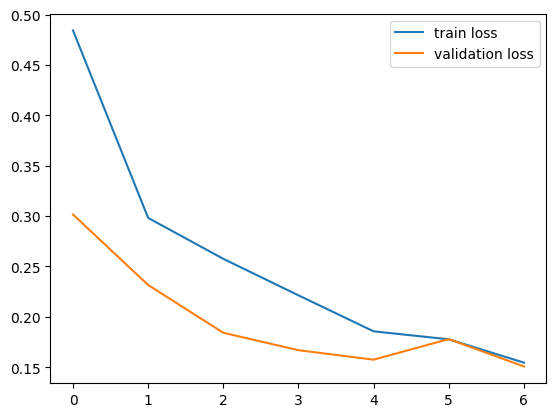

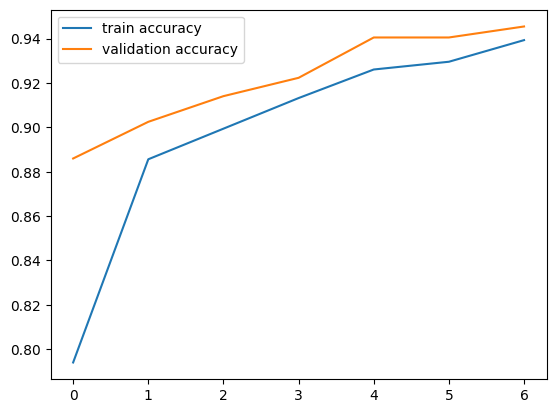

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

48/48 [==============================] - 0s 6ms/step


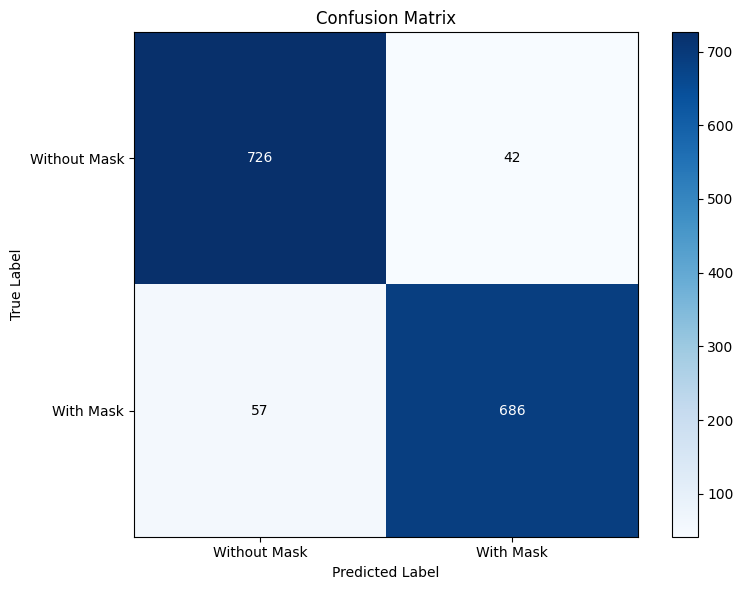

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained the model and have X_test_scaled and Y_test

# Get model predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred_classes)

# Plot the confusion matrix as a table
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_of_classes)
plt.xticks(tick_marks, ['Without Mask', 'With Mask'])
plt.yticks(tick_marks, ['Without Mask', 'With Mask'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add label values to each cell
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.show()

Path of the image to be predicted: /content/WhatsApp Image 2023-05-15 at 04.33.42.jpg


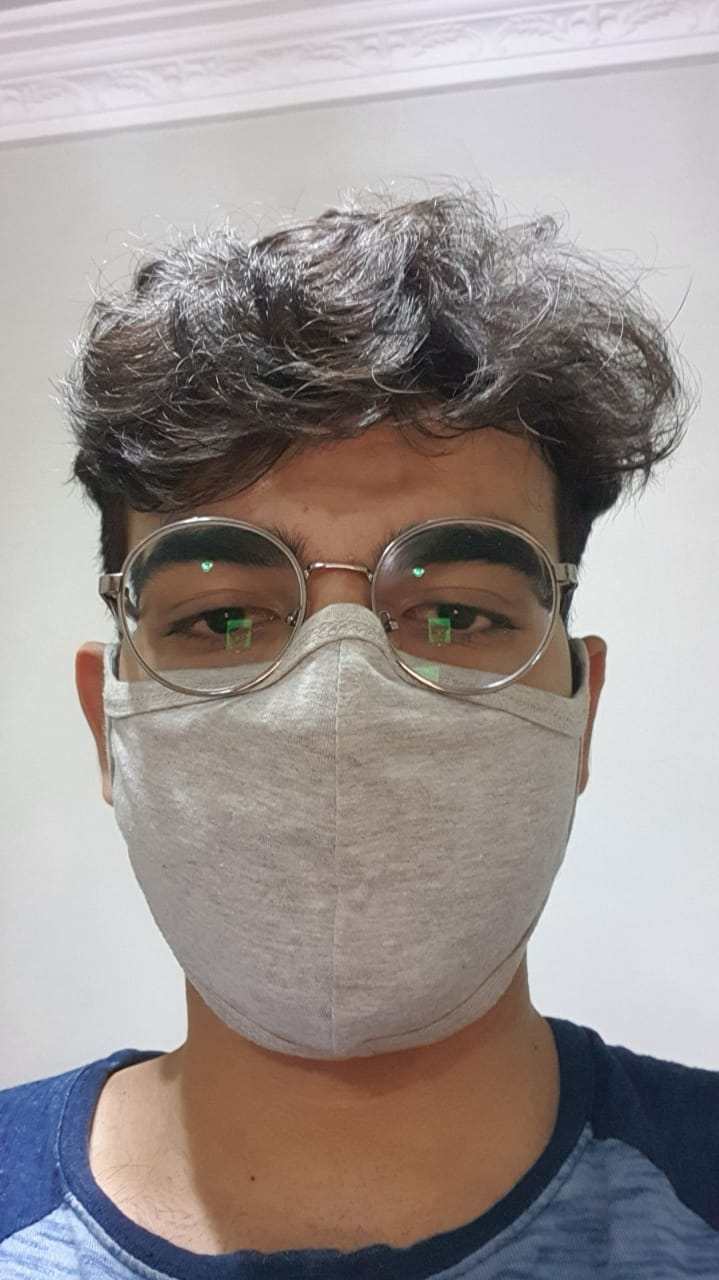

1/1 [==============================] - 0s 33ms/step
[[0.07028939 0.89572483]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')